In [124]:
%matplotlib inline 

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
dfbhc = pd.read_csv('~/Documents/R projects/bhcf1712.txt', sep="^", 
                    usecols=['RSSD9001', 'RSSD9017', 'RSSD9016', 'RSSD9045', 'BHCT2170', 'BHDM3545', 'BHDM3548'],
                    na_values="--------",
#                    dtype={'RSSD9001': np.int32, 'RSSD9017': np.str, 'RSSD9045': np.int32, 'BHCT2170': np.int32, 
#                           'BHDM3545': np.int32, 'BHDM3548': np.int32}, 
                    low_memory=False)
dfbhc.head()

,RSSD9001,RSSD9045,BHCT2170,BHDM3545,BHDM3548,RSSD9016,RSSD9017
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1020180.0,1.0,11994235.0,6716.0,16811.0,0.0,BREMER FINANCIAL CORPORATION
2,1020201.0,1.0,NaN,NaN,NaN,1.0,HSBC USA INC.
3,1020395.0,1.0,NaN,NaN,NaN,0.0,SOUTHERN NATIONAL CORPORATION
4,1020582.0,1.0,NaN,NaN,NaN,0.0,WOODTRUST FINANCIAL CORP


In [136]:
dfsmall = dfbhc.loc[1:, ['RSSD9001', 'RSSD9017', 'RSSD9016','RSSD9045', 'BHCT2170', 'BHDM3545', 'BHDM3548']]
dfsmall.head()

,RSSD9001,RSSD9017,RSSD9016,RSSD9045,BHCT2170,BHDM3545,BHDM3548
1,1020180.0,BREMER FINANCIAL CORPORATION,0.0,1.0,11994235.0,6716.0,16811.0
2,1020201.0,HSBC USA INC.,1.0,1.0,NaN,NaN,NaN
3,1020395.0,SOUTHERN NATIONAL CORPORATION,0.0,1.0,NaN,NaN,NaN
4,1020582.0,WOODTRUST FINANCIAL CORP,0.0,1.0,NaN,NaN,NaN
5,1020591.0,"PINNACLE BANCORP, INC.",0.0,1.0,NaN,NaN,NaN


In [137]:
#rename columns
dfsmall = dfsmall.rename(index=str, columns={"RSSD9001": "rssd_id", "RSSD9017": "legal_name", "RSSD9045":"bhc_indicator", 
                                             "RSSD9016": "fhc_idicator", "BHCT2170":"total_assets","BHDM3545":"trading_assets", 
                                             "BHDM3548": "trading_liab"}
              )


In [138]:
#Now i need to add up the aggregated trading after i convert some data types.
dfsmall.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4596 entries, 1 to 4596
Data columns (total 7 columns):
rssd_id           4596 non-null float64
legal_name        4596 non-null object
fhc_idicator      4596 non-null float64
bhc_indicator     4596 non-null float64
total_assets      636 non-null float64
trading_assets    155 non-null float64
trading_liab      155 non-null float64
dtypes: float64(6), object(1)
memory usage: 287.2+ KB


In [64]:
#this is not necessary using the na_values=... statement in the read_csv! 
#cols = ['RSSD ID', 'FHC IDICATOR', 'BHC INDICATOR', 'TOTAL ASSETS', 'TRADING ASSETS', 'TRADING LIABILITIES']

#dfsmall[cols] = dfsmall[cols].apply(pd.to_numeric, errors='coerce', axis=1)

In [139]:
dfsmall['aggr_trading'] = dfsmall['trading_assets'] + dfsmall['trading_liab']
dfsmall.head()

,rssd_id,legal_name,fhc_idicator,bhc_indicator,total_assets,trading_assets,trading_liab,aggr_trading
1,1020180.0,BREMER FINANCIAL CORPORATION,0.0,1.0,11994235.0,6716.0,16811.0,23527.0
2,1020201.0,HSBC USA INC.,1.0,1.0,NaN,NaN,NaN,NaN
3,1020395.0,SOUTHERN NATIONAL CORPORATION,0.0,1.0,NaN,NaN,NaN,NaN
4,1020582.0,WOODTRUST FINANCIAL CORP,0.0,1.0,NaN,NaN,NaN,NaN
5,1020591.0,"PINNACLE BANCORP, INC.",0.0,1.0,NaN,NaN,NaN,NaN


In [127]:
dfsmall.query('aggr_trading >1000000').count()

rssd_id           32
LEGAL_NAME        32
fhc_idicator      32
bhc_indicator     32
total_assets      31
trading_assets    32
trading_liab      32
aggr_trading      32
dtype: int64

In [155]:
dftrading = dfsmall.query('aggr_trading > 0').sort_values('aggr_trading', ascending=False)
dftrading.head()

,rssd_id,legal_name,fhc_idicator,bhc_indicator,total_assets,trading_assets,trading_liab,aggr_trading
431,1073757.0,BANK OF AMERICA CORPORATION,1.0,1.0,2.281477e+09,159391000.0,56865000.0,216256000.0
47,1039502.0,JPMORGAN CHASE & CO.,1.0,1.0,2.533600e+09,177380000.0,38311000.0,215691000.0
2593,2380443.0,"GOLDMAN SACHS GROUP, INC., THE",1.0,1.0,9.167870e+08,153123000.0,46350000.0,199473000.0
2366,2162966.0,MORGAN STANLEY,1.0,1.0,8.517330e+08,146610000.0,50678000.0,197288000.0
2205,1951350.0,CITIGROUP INC.,1.0,1.0,1.842465e+09,108036000.0,46472000.0,154508000.0


In [156]:
dftrading.to_csv('trading_banks_1712.csv', index=False)

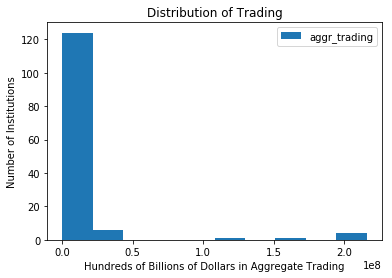

In [149]:
dftrading.plot(y='aggr_trading', kind='hist')
plt.title('Distribution of Trading')
plt.xlabel('Hundreds of Billions of Dollars in Aggregate Trading')
plt.ylabel('Number of Institutions');

In [153]:
dftradingb = dftrading.query('aggr_trading < 1000000')
dftradingb.count()

rssd_id           104
legal_name        104
fhc_idicator      104
bhc_indicator     104
total_assets      104
trading_assets    104
trading_liab      104
aggr_trading      104
dtype: int64

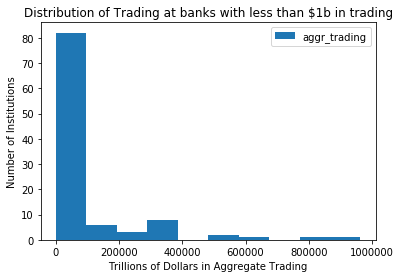

In [154]:
dftradingb.plot(y='aggr_trading', kind='hist')
plt.title('Distribution of Trading at banks with less than $1b in trading')
plt.xlabel('Trillions of Dollars in Aggregate Trading')
plt.ylabel('Number of Institutions');